- Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing

from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings('ignore')

# Data Profiling

In [2]:
#Load Dataset
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Exploratory Data Analysis

- Describing Data

In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


<AxesSubplot:>

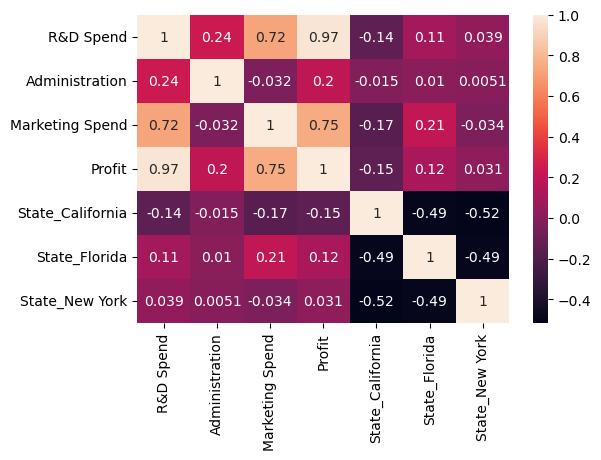

In [11]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True)
# it's known that R&D and Marketting spend are multicolon therefore that feature need to be taken down or dropped

# Feature Engineering

- One Hot Encoding for Categorical Data like 'State'

In [7]:
state_enc  = pd.get_dummies(df['State'], prefix = 'State', drop_first = False)
df = df.drop(['State'], axis = 1)
df = pd.concat([df, state_enc], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
#Using min max scaler

In [12]:
scaler = MinMaxScaler()

In [13]:
df[['Administration']] = scaler.fit_transform(df[['Administration']])

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,0.651744,471784.10,192261.83,0,0,1
1,162597.70,0.761972,443898.53,191792.06,1,0,0
2,153441.51,0.379579,407934.54,191050.39,0,1,0
3,144372.41,0.512998,383199.62,182901.99,0,0,1
4,142107.34,0.305328,366168.42,166187.94,0,1,0


# Preprocessing Modelling

- FEATURE SELECTION
Dropping features which causing multicollinearity based on the preceeding heatmap 

In [23]:
df.drop('R&D Spend', axis=1, inplace=True)

In [24]:
df.drop('Marketing Spend', axis=1, inplace=True)

In [25]:
#FEATURE IMPORTANCE

In [26]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']

In [27]:
X

,Administration,State_California,State_Florida,State_New York
0,0.651744,0,0,1
1,0.761972,1,0,0
2,0.379579,0,1,0
3,0.512998,0,0,1
4,0.305328,0,1,0
5,0.369448,0,0,1
6,0.730161,1,0,0
7,0.717457,0,1,0
8,0.741733,0,0,1
9,0.436929,1,0,0


In [28]:
#DEFINE THE MODEL

In [29]:
model = LinearRegression()

In [30]:
#FIT THE MODEL
model.fit(X, y)

LinearRegression()

In [46]:
#GET IMPORTANCE
importance = model.coef_

- Showing The Feature Importance Value, if any value is negative we should drop it
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. (Machine Learning Mastery)

In [47]:
#SUMMARIZE FEATURE IMPORTANCE
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 37674.52379
Feature: 1, Score: 1892840291289584640.00000
Feature: 2, Score: 1892840291289599488.00000
Feature: 3, Score: 1892840291289594368.00000


<function matplotlib.pyplot.show(close=None, block=None)>

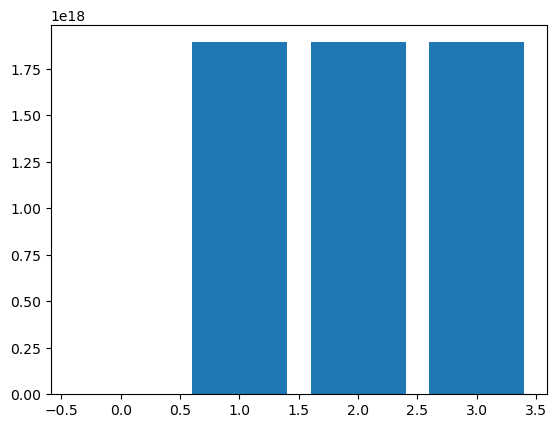

In [33]:
#PLOT FEATURE IMPORTANCE
plt.bar([x for x in range(len(importance))], importance)
plt.show

- Splitting Training and Test Set

In [57]:
# using train size 0.8 or 80% total data and random_state value = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Multiple Linear Regression

In [55]:
#MODEL
model = LinearRegression()

In [56]:
# Fitting model to the trained data
model.fit(X_train, y_train)

LinearRegression()

In [51]:
#PREDICT THE RESULT
y_pred = model.predict(X_test)

In [52]:
result = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

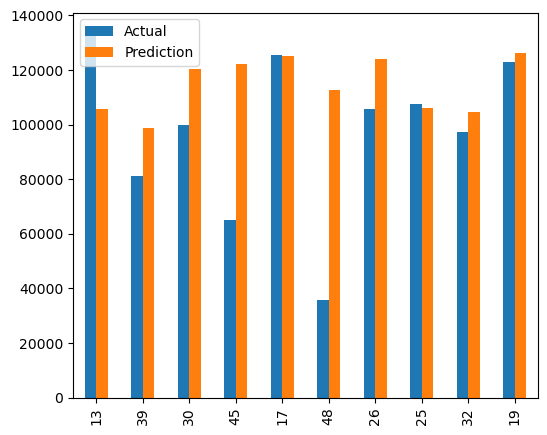

In [53]:
#PLOT THE RESULT
result.plot(kind ='bar', figsize=(6,5))
plt.show()

# EVALUATE MODEL

- Showing its MAPE (mean absolute percentage error)

In [54]:
mean_absolute_percentage_error(y_test, y_pred)

0.3965270093583587